In [560]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams['figure.figsize'] = (20,10)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [561]:
df = pd.read_csv('Bengaluru_House_Data.csv')

In [562]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [563]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [564]:
print('Area Type \n', df.value_counts('area_type'))
print('\n')
print('Availability \n', df.value_counts('availability'))
print('\n')
print('Location \n', df.value_counts('location'))
print('\n')
print('Size \n', df.value_counts('size'))
print('\n')
print('Number of Bathrooms \n', df.value_counts('bath'))
print('\n')
print(' Number of Balcony \n', df.value_counts('balcony'))

Area Type 
 area_type
Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
dtype: int64


Availability 
 availability
Ready To Move    10581
18-Dec             307
18-May             295
18-Apr             271
18-Aug             200
                 ...  
16-Oct               1
16-Nov               1
16-Jul               1
16-Jan               1
14-Jul               1
Length: 81, dtype: int64


Location 
 location
Whitefield             540
Sarjapur  Road         399
Electronic City        302
Kanakpura Road         273
Thanisandra            234
                      ... 
 Banaswadi               1
Kanakadasa Layout        1
Kanakapur main road      1
Kanakapura  Rod          1
whitefiled               1
Length: 1305, dtype: int64


Size 
 size
2 BHK         5199
3 BHK         4310
4 Bedroom      826
4 BHK          591
3 Bedroom      547
1 BHK          538
2 Bedroom      329
5 Bedroom      297
6 Bedroom      191
1 Bedroom 

In [565]:
df1 = df.drop(['availability', 'society', 'balcony'], axis='columns')

In [566]:
df1.head()

,area_type,location,size,total_sqft,bath,price
0,Super built-up Area,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Built-up Area,Uttarahalli,3 BHK,1440,2.0,62.00
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Super built-up Area,Kothanur,2 BHK,1200,2.0,51.00


In [567]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   area_type   13320 non-null  object 
 1   location    13319 non-null  object 
 2   size        13304 non-null  object 
 3   total_sqft  13320 non-null  object 
 4   bath        13247 non-null  float64
 5   price       13320 non-null  float64
dtypes: float64(2), object(4)
memory usage: 624.5+ KB


In [568]:
df1.isnull().sum()

area_type      0
location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [569]:
#since the NA values is less than 1% of total data size, we are going to drop the NA values.

df2 = df1.dropna()
df2.isnull().sum()

area_type     0
location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [570]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13246 entries, 0 to 13319
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   area_type   13246 non-null  object 
 1   location    13246 non-null  object 
 2   size        13246 non-null  object 
 3   total_sqft  13246 non-null  object 
 4   bath        13246 non-null  float64
 5   price       13246 non-null  float64
dtypes: float64(2), object(4)
memory usage: 724.4+ KB


In [571]:
print('The total rows dropped are:', 13320-13246, 'rows, thus in Percent it is:', (74/13320)*100, '%')

The total rows dropped are: 74 rows, thus in Percent it is: 0.5555555555555556 %


In [572]:
# The size is an important factor in pricing, so cleaning is major priority

df2['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [573]:
df2['bhk'] = df2['size'].apply(lambda x: int(x.split(' ')[0]))

C:\Users\gaura\AppData\Local\Temp\ipykernel_1768\1142257054.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['bhk'] = df2['size'].apply(lambda x: int(x.split(' ')[0]))


In [574]:
df2.head()

,area_type,location,size,total_sqft,bath,price,bhk
0,Super built-up Area,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Built-up Area,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Super built-up Area,Kothanur,2 BHK,1200,2.0,51.00,2


In [575]:
df3 = df2.copy()

In [576]:
df3[df3.bhk>10]

,area_type,location,size,total_sqft,bath,price,bhk
459,Super built-up Area,1 Giri Nagar,11 BHK,5000,9.0,360.0,11
1718,Super built-up Area,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
1768,Plot Area,1 Ramamurthy Nagar,11 Bedroom,1200,11.0,170.0,11
3379,Super built-up Area,1Hanuman Nagar,19 BHK,2000,16.0,490.0,19
3609,Super built-up Area,Koramangala Industrial Layout,16 BHK,10000,16.0,550.0,16
3853,Plot Area,1 Annasandrapalya,11 Bedroom,1200,6.0,150.0,11
4684,Plot Area,Munnekollal,43 Bedroom,2400,40.0,660.0,43
4916,Super built-up Area,1Channasandra,14 BHK,1250,15.0,125.0,14
6533,Plot Area,Mysore Road,12 Bedroom,2232,6.0,300.0,12
7979,Super built-up Area,1 Immadihalli,11 BHK,6000,12.0,150.0,11


In [577]:
df3.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [578]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

    

In [579]:
df3[~df3['total_sqft'].apply(is_float)]

,area_type,location,size,total_sqft,bath,price,bhk
30,Super built-up Area,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Super built-up Area,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,Super built-up Area,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Super built-up Area,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,Super built-up Area,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
...,...,...,...,...,...,...,...
12975,Super built-up Area,Whitefield,2 BHK,850 - 1060,2.0,38.190,2
12990,Super built-up Area,Talaghattapura,3 BHK,1804 - 2273,3.0,122.000,3
13059,Super built-up Area,Harlur,2 BHK,1200 - 1470,2.0,72.760,2
13265,Super built-up Area,Hoodi,2 BHK,1133 - 1384,2.0,59.135,2


In [580]:
df3.loc[188]

area_type     Super built-up  Area
location                  KR Puram
size                         2 BHK
total_sqft             1015 - 1540
bath                           2.0
price                         56.8
bhk                              2
Name: 188, dtype: object

In [581]:
def convert_sqft_num(x):
    tokens = x.split('-')
    if len(tokens) ==2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None

In [582]:
convert_sqft_num('1015 - 1540')

1277.5

In [583]:
df4 = df3.copy()

In [584]:
df4['total_sqft'] = df4['total_sqft'].apply(convert_sqft_num)
df4.head()

,area_type,location,size,total_sqft,bath,price,bhk
0,Super built-up Area,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Built-up Area,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Super built-up Area,Kothanur,2 BHK,1200.0,2.0,51.00,2


In [585]:
df4.loc[188]

area_type     Super built-up  Area
location                  KR Puram
size                         2 BHK
total_sqft                  1277.5
bath                           2.0
price                         56.8
bhk                              2
Name: 188, dtype: object

In [586]:
df5 = df4.copy()

In [587]:
df5['price_persqft'] = round(df5['price']*100000/df5['total_sqft'], 2)
df5.head()

,area_type,location,size,total_sqft,bath,price,bhk,price_persqft
0,Super built-up Area,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.81
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.38
2,Built-up Area,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.56
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.89
4,Super built-up Area,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.00


In [588]:
len(df5.location.unique())

1304

In [589]:
df5.location = df5.location.apply(lambda x: x.strip())

location_stats = df5.groupby('location')['location'].agg('count').sort_values(ascending=False)
location_stats

location
Whitefield               535
Sarjapur  Road           392
Electronic City          304
Kanakpura Road           266
Thanisandra              236
                        ... 
1 Giri Nagar               1
Kanakapura Road,           1
Kanakapura main  Road      1
Karnataka Shabarimala      1
whitefiled                 1
Name: location, Length: 1293, dtype: int64

In [590]:
len(location_stats[location_stats<=8])

1018

In [591]:
location_stats_lessthan8 = location_stats[location_stats<=8]
location_stats_lessthan8

location
Huskur                   8
Kanaka Nagar             8
Thirumenahalli           8
Vajarahalli              8
Vasanth nagar            8
                        ..
1 Giri Nagar             1
Kanakapura Road,         1
Kanakapura main  Road    1
Karnataka Shabarimala    1
whitefiled               1
Name: location, Length: 1018, dtype: int64

In [592]:
len(df5.location.unique())

1293

In [593]:
df5.location = df5.location.apply(lambda x: 'other' if x in location_stats_lessthan8 else x)
len(df5.location.unique())

276

In [594]:
df5.head()

,area_type,location,size,total_sqft,bath,price,bhk,price_persqft
0,Super built-up Area,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.81
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.38
2,Built-up Area,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.56
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.89
4,Super built-up Area,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.00


In [595]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13246 entries, 0 to 13319
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   area_type      13246 non-null  object 
 1   location       13246 non-null  object 
 2   size           13246 non-null  object 
 3   total_sqft     13200 non-null  float64
 4   bath           13246 non-null  float64
 5   price          13246 non-null  float64
 6   bhk            13246 non-null  int64  
 7   price_persqft  13200 non-null  float64
dtypes: float64(4), int64(1), object(3)
memory usage: 1.4+ MB


In [596]:
df5.describe().T

,count,mean,std,min,25%,50%,75%,max
total_sqft,13200.0,1555.302783,1237.323445,1.00,1100.0,1275.000,1672.00,52272.0
bath,13246.0,2.692586,1.341506,1.00,2.0,2.000,3.00,40.0
price,13246.0,112.389392,149.076587,8.00,50.0,72.000,120.00,3600.0
bhk,13246.0,2.801902,1.295758,1.00,2.0,3.000,3.00,43.0
price_persqft,13200.0,7920.759160,106727.155208,267.83,4267.7,5438.335,7317.07,12000000.0


In [597]:
#considering threshold for sqft_perbedroom at 300 sqft per bedroom
df6 = df5[~(df5.total_sqft/df5.bhk<300)]
df6.shape

(12502, 8)

In [598]:
df6.describe().T

,count,mean,std,min,25%,50%,75%,max
total_sqft,12456.0,1590.189927,1260.404795,300.00,1115.00,1300.00,1700.00,52272.00
bath,12502.0,2.564790,1.084946,1.00,2.00,2.00,3.00,16.00
price,12502.0,111.311915,152.089966,9.00,49.00,70.00,115.00,3600.00
bhk,12502.0,2.650696,0.981698,1.00,2.00,3.00,3.00,16.00
price_persqft,12456.0,6308.502836,4168.127366,267.83,4210.53,5294.12,6916.67,176470.59


In [599]:
#removing the outliers of price_persqft per location

def remove_pps_outlier(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_persqft)
        st = np.std(subdf.price_persqft)
        reduced_df = subdf[(subdf.price_persqft>(m-st)) & (subdf.price_persqft<=(m+st))]
        df_out = pd.concat([df_out, reduced_df], ignore_index = True)
    return df_out

df7 = remove_pps_outlier(df6)
df7.shape

(10199, 8)

In [600]:
df7.describe().T

,count,mean,std,min,25%,50%,75%,max
total_sqft,10199.0,1508.736808,896.827543,300.0,1109.0,1282.00,1650.00,30400.0
bath,10199.0,2.476811,0.989763,1.0,2.0,2.00,3.00,16.0
price,10199.0,92.150616,95.107336,10.0,49.0,67.00,100.00,2200.0
bhk,10199.0,2.574272,0.899406,1.0,2.0,2.00,3.00,16.0
price_persqft,10199.0,5673.803563,2310.464321,1250.0,4250.0,5176.47,6428.57,24509.8


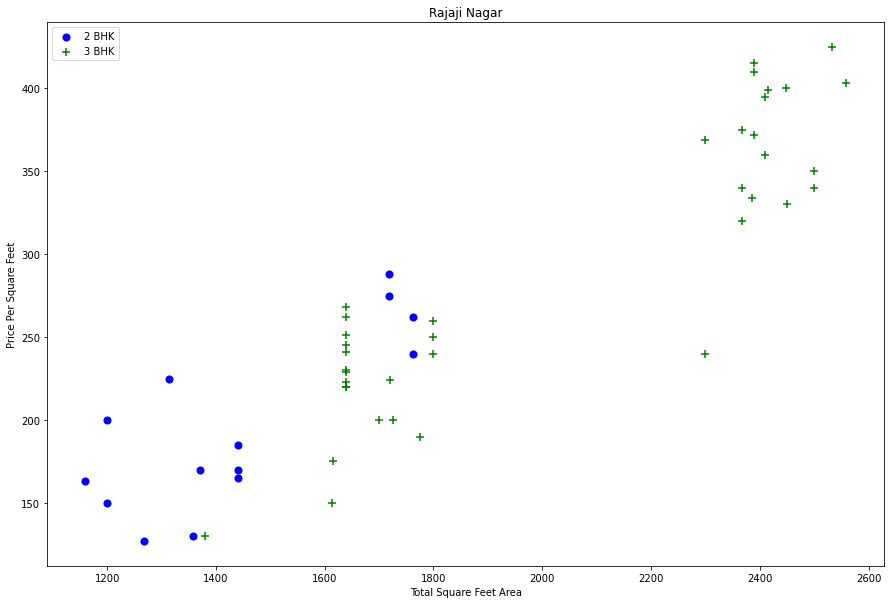

In [601]:
def plot_scatter(df,location):
    bhk2 = df[(df.location == location) & (df.bhk == 2)]
    bhk3 = df[(df.location == location) & (df.bhk == 3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.total_sqft, bhk2.price, color = 'blue', label = '2 BHK', s = 50)
    plt.scatter(bhk3.total_sqft, bhk3.price, marker = '+', color = 'green', label = '3 BHK', s = 50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price Per Square Feet")
    plt.title(location)
    plt.legend()
    
plot_scatter(df7,"Rajaji Nagar")

In [602]:

def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_persqft),
                'std': np.std(bhk_df.price_persqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_persqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices, axis = 'index')
            

#these functions we are not going to run since the we have consider the area_type and area_type can influence the price.


In [603]:
df7[df7.price_persqft>11500]

,area_type,location,size,total_sqft,bath,price,bhk,price_persqft
0,Super built-up Area,1st Block Jayanagar,4 BHK,2850.0,4.0,428.0,4,15017.54
1,Super built-up Area,1st Block Jayanagar,3 BHK,1630.0,3.0,194.0,3,11901.84
2,Super built-up Area,1st Block Jayanagar,3 BHK,1875.0,2.0,235.0,3,12533.33
4,Super built-up Area,1st Block Jayanagar,2 BHK,1235.0,2.0,148.0,2,11983.81
5,Super built-up Area,1st Block Jayanagar,4 BHK,2750.0,4.0,413.0,4,15018.18
...,...,...,...,...,...,...,...,...
10111,Super built-up Area,other,4 BHK,3500.0,3.0,425.0,4,12142.86
10112,Built-up Area,other,4 Bedroom,3100.0,5.0,425.0,4,13709.68
10122,Built-up Area,other,2 BHK,1270.0,2.0,172.0,2,13543.31
10138,Super built-up Area,other,2 BHK,600.0,3.0,72.0,2,12000.00


In [604]:
df7.head()

,area_type,location,size,total_sqft,bath,price,bhk,price_persqft
0,Super built-up Area,1st Block Jayanagar,4 BHK,2850.0,4.0,428.0,4,15017.54
1,Super built-up Area,1st Block Jayanagar,3 BHK,1630.0,3.0,194.0,3,11901.84
2,Super built-up Area,1st Block Jayanagar,3 BHK,1875.0,2.0,235.0,3,12533.33
3,Built-up Area,1st Block Jayanagar,3 BHK,1200.0,2.0,130.0,3,10833.33
4,Super built-up Area,1st Block Jayanagar,2 BHK,1235.0,2.0,148.0,2,11983.81


In [605]:
df7.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10199 entries, 0 to 10198
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   area_type      10199 non-null  object 
 1   location       10199 non-null  object 
 2   size           10199 non-null  object 
 3   total_sqft     10199 non-null  float64
 4   bath           10199 non-null  float64
 5   price          10199 non-null  float64
 6   bhk            10199 non-null  int64  
 7   price_persqft  10199 non-null  float64
dtypes: float64(4), int64(1), object(3)
memory usage: 637.6+ KB


In [606]:
df8 = df7.copy()

In [607]:
#df8 = remove_bhk_outliers(df7)
df8.shape

(10199, 8)

Text(0, 0.5, 'Count')

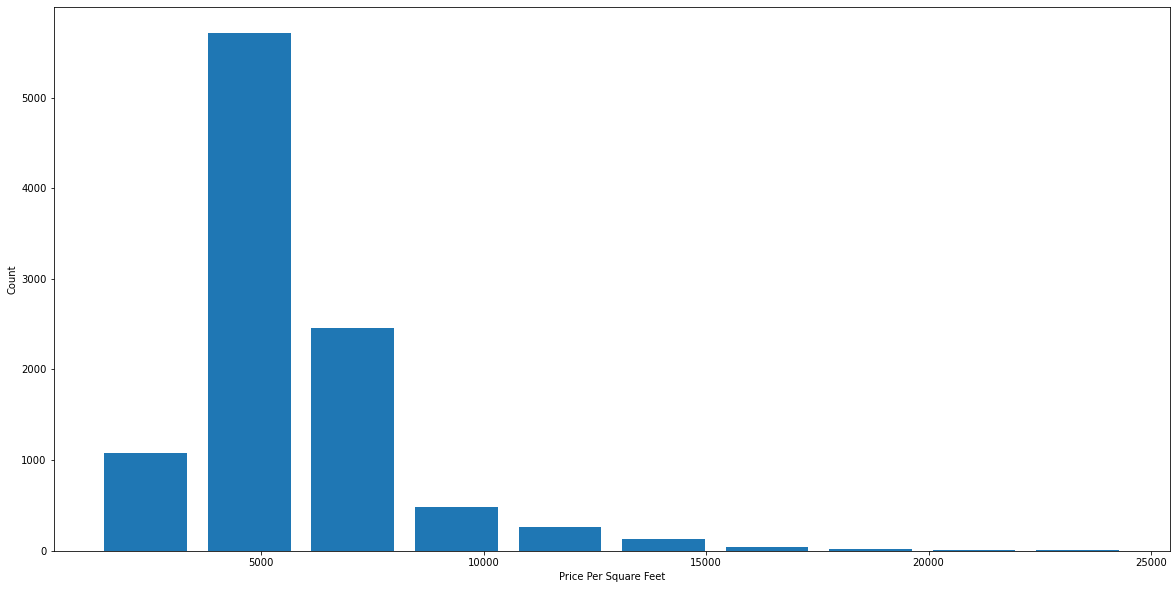

In [608]:
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(df8.price_persqft, rwidth = 0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

In [609]:
df8.head()

,area_type,location,size,total_sqft,bath,price,bhk,price_persqft
0,Super built-up Area,1st Block Jayanagar,4 BHK,2850.0,4.0,428.0,4,15017.54
1,Super built-up Area,1st Block Jayanagar,3 BHK,1630.0,3.0,194.0,3,11901.84
2,Super built-up Area,1st Block Jayanagar,3 BHK,1875.0,2.0,235.0,3,12533.33
3,Built-up Area,1st Block Jayanagar,3 BHK,1200.0,2.0,130.0,3,10833.33
4,Super built-up Area,1st Block Jayanagar,2 BHK,1235.0,2.0,148.0,2,11983.81


In [610]:
df8.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10199 entries, 0 to 10198
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   area_type      10199 non-null  object 
 1   location       10199 non-null  object 
 2   size           10199 non-null  object 
 3   total_sqft     10199 non-null  float64
 4   bath           10199 non-null  float64
 5   price          10199 non-null  float64
 6   bhk            10199 non-null  int64  
 7   price_persqft  10199 non-null  float64
dtypes: float64(4), int64(1), object(3)
memory usage: 637.6+ KB


In [611]:
df8.describe().T

,count,mean,std,min,25%,50%,75%,max
total_sqft,10199.0,1508.736808,896.827543,300.0,1109.0,1282.00,1650.00,30400.0
bath,10199.0,2.476811,0.989763,1.0,2.0,2.00,3.00,16.0
price,10199.0,92.150616,95.107336,10.0,49.0,67.00,100.00,2200.0
bhk,10199.0,2.574272,0.899406,1.0,2.0,2.00,3.00,16.0
price_persqft,10199.0,5673.803563,2310.464321,1250.0,4250.0,5176.47,6428.57,24509.8


In [612]:
df8.bath.unique()

array([ 4.,  3.,  2.,  5.,  1.,  8.,  9.,  6., 14.,  7., 12., 16., 13.])

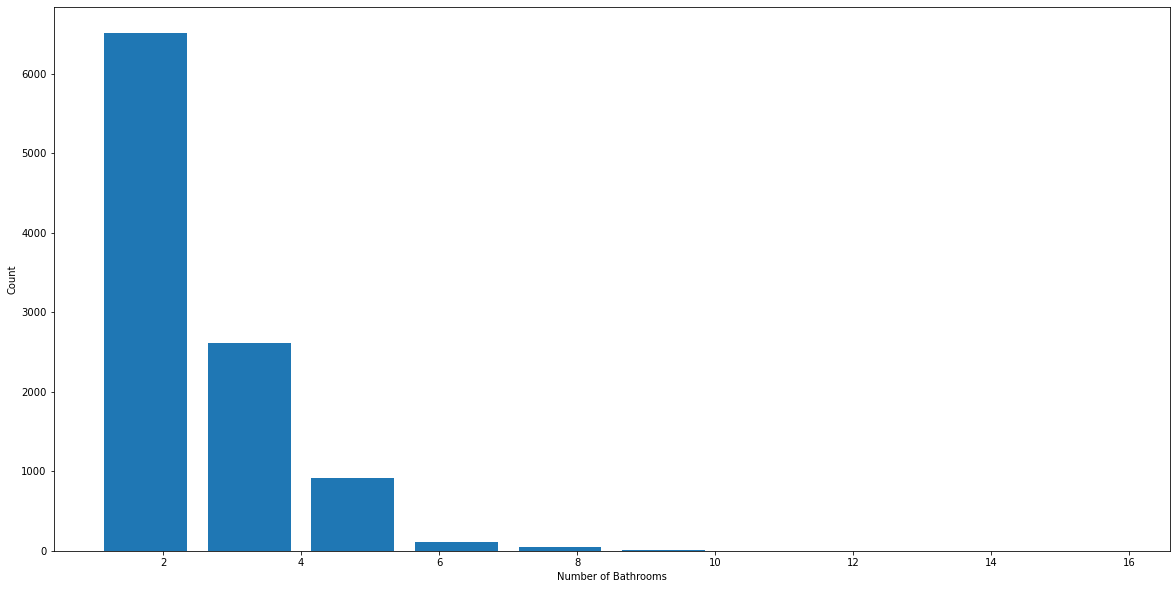

In [613]:
plt.hist(df8.bath, rwidth = 0.8)
plt.xlabel("Number of Bathrooms")
plt.ylabel("Count");

In [614]:
df8[df8.bath>df8.bhk+2]

,area_type,location,size,total_sqft,bath,price,bhk,price_persqft
602,Plot Area,BTM 1st Stage,9 Bedroom,3300.0,14.0,500.0,9,15151.52
1679,Built-up Area,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4,3252.03
5392,Built-up Area,Nagasandra,4 Bedroom,7000.0,8.0,450.0,4,6428.57
6893,Super built-up Area,Thanisandra,3 BHK,1806.0,6.0,116.0,3,6423.03
8567,Super built-up Area,other,6 BHK,11338.0,9.0,1000.0,6,8819.90


In [615]:
df9 = df8[df8.bath<df8.bhk+2]
df9.shape

(10106, 8)

In [616]:
df10 = df9.drop(['size','price_persqft'], axis = 'columns')
df10.head()

,area_type,location,total_sqft,bath,price,bhk
0,Super built-up Area,1st Block Jayanagar,2850.0,4.0,428.0,4
1,Super built-up Area,1st Block Jayanagar,1630.0,3.0,194.0,3
2,Super built-up Area,1st Block Jayanagar,1875.0,2.0,235.0,3
3,Built-up Area,1st Block Jayanagar,1200.0,2.0,130.0,3
4,Super built-up Area,1st Block Jayanagar,1235.0,2.0,148.0,2


In [617]:
df10.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10106 entries, 0 to 10198
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   area_type   10106 non-null  object 
 1   location    10106 non-null  object 
 2   total_sqft  10106 non-null  float64
 3   bath        10106 non-null  float64
 4   price       10106 non-null  float64
 5   bhk         10106 non-null  int64  
dtypes: float64(3), int64(1), object(2)
memory usage: 552.7+ KB


In [618]:
df11 = df10.copy()

In [619]:
df11.head()

,area_type,location,total_sqft,bath,price,bhk
0,Super built-up Area,1st Block Jayanagar,2850.0,4.0,428.0,4
1,Super built-up Area,1st Block Jayanagar,1630.0,3.0,194.0,3
2,Super built-up Area,1st Block Jayanagar,1875.0,2.0,235.0,3
3,Built-up Area,1st Block Jayanagar,1200.0,2.0,130.0,3
4,Super built-up Area,1st Block Jayanagar,1235.0,2.0,148.0,2


In [620]:
"""for feature in df11.columns:
    if df11[feature].dtype == 'object':
        df11[feature] = pd.Categorical(df11[feature]).codes
"""
df11.head()

,area_type,location,total_sqft,bath,price,bhk
0,Super built-up Area,1st Block Jayanagar,2850.0,4.0,428.0,4
1,Super built-up Area,1st Block Jayanagar,1630.0,3.0,194.0,3
2,Super built-up Area,1st Block Jayanagar,1875.0,2.0,235.0,3
3,Built-up Area,1st Block Jayanagar,1200.0,2.0,130.0,3
4,Super built-up Area,1st Block Jayanagar,1235.0,2.0,148.0,2


In [621]:
dummies = pd.get_dummies(df11.location)

In [622]:
df11 = pd.concat([df11,dummies.drop('other', axis = 'columns')], axis = 'columns')

In [623]:
df12 = df11.drop(['location'], axis='columns')
df12.head()

,area_type,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Block Koramangala,1st Phase JP Nagar,2nd Phase JP Nagar,2nd Phase Judicial Layout,...,Vishwapriya Layout,Vittasandra,Volagerekallahalli,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yemlur,Yeshwanthpur
0,Super built-up Area,2850.0,4.0,428.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Super built-up Area,1630.0,3.0,194.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Super built-up Area,1875.0,2.0,235.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Built-up Area,1200.0,2.0,130.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Super built-up Area,1235.0,2.0,148.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [624]:
print('Area Type \n', df12.value_counts('area_type'))
print('\n')

Area Type 
 area_type
Super built-up  Area    7370
Built-up  Area          1931
Plot  Area               743
Carpet  Area              62
dtype: int64




In [625]:
#extra step

for feature in df12.columns:
    if df12[feature].dtype == 'object':
        df12[feature] = pd.Categorical(df12[feature]).codes

df12.head(10)

,area_type,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Block Koramangala,1st Phase JP Nagar,2nd Phase JP Nagar,2nd Phase Judicial Layout,...,Vishwapriya Layout,Vittasandra,Volagerekallahalli,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yemlur,Yeshwanthpur
0,3,2850.0,4.0,428.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3,1630.0,3.0,194.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,1875.0,2.0,235.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1200.0,2.0,130.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,3,1235.0,2.0,148.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,3,2750.0,4.0,413.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,3,2450.0,4.0,368.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,1415.0,2.0,110.0,2,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,860.0,2.0,65.5,2,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,3,3000.0,3.0,300.0,4,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [626]:
print('Area Type \n', df12.value_counts('area_type'))
print('\n')
print('Number of Bathrooms \n', df12.value_counts('bath'))
print('\n')
print('BHK Type \n', df12.value_counts('bhk'))
print('\n')


Area Type 
 area_type
3    7370
0    1931
2     743
1      62
dtype: int64


Number of Bathrooms 
 bath
2.0     5899
3.0     2610
4.0      672
1.0      611
5.0      219
6.0       51
7.0       21
8.0       12
9.0        8
12.0       1
13.0       1
16.0       1
dtype: int64


BHK Type 
 bhk
2     4728
3     3965
4      688
1      516
5      105
6       57
7       18
8       17
9        7
11       2
10       1
13       1
16       1
dtype: int64




In [627]:
df12.shape

(10106, 280)

In [628]:
df13 = df12.copy()

In [629]:
X = df13.drop("price", axis = 1)

y = df13.pop("price")

In [630]:
X.head()

,area_type,total_sqft,bath,bhk,1st Block Jayanagar,1st Block Koramangala,1st Phase JP Nagar,2nd Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,...,Vishwapriya Layout,Vittasandra,Volagerekallahalli,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yemlur,Yeshwanthpur
0,3,2850.0,4.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3,1630.0,3.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,1875.0,2.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1200.0,2.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,3,1235.0,2.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [631]:
y.head()

0    428.0
1    194.0
2    235.0
3    130.0
4    148.0
Name: price, dtype: float64

In [632]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 10)

In [633]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
lf = LinearRegression()
lf.fit(X_train, y_train)
lf.score(X_test, y_test)

0.7715909699661119

In [634]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits = 5, test_size = 0.3, random_state = 0)

cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.85726602, 0.79831719, 0.85900032, 0.8726199 , 0.81590087])

In [635]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model(X,y):
    algos = {
        'linear_regression' : {
            'model' : LinearRegression(),
            'params' :{
                'normalize' : [True, False]
            }
        },   
         'lasso': {
             'model': Lasso(),
             'params' : {
                 'alpha' : [1,2],
                 'selection' : ['random', 'cyclic']
             }
         },    
         'decision_tree' : {
             'model' : DecisionTreeRegressor(),
             'params' : {
                 'criterion' : ['mse', 'friedman_mse'],
                 'splitter' : ['best', 'random']   
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits = 5, test_size = 0.3, random_state = 0)
    for algo_name, config in algos.items():
        gs = GridSearchCV(config['model'], config['params'], cv=cv, return_train_score = False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score' : gs.best_score_,
            'best_params' : gs.best_params_
        })
        
    return pd.DataFrame(scores, columns = ['model', 'best_score', 'best_params'])

find_best_model(X,y)

C:\Users\gaura\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
C:\Users\gaura\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model =

,model,best_score,best_params
0,linear_regression,0.840621,{'normalize': False}
1,lasso,0.678952,"{'alpha': 1, 'selection': 'cyclic'}"
2,decision_tree,0.715067,"{'criterion': 'mse', 'splitter': 'best'}"


In [636]:
X.columns

Index(['area_type', 'total_sqft', 'bath', 'bhk', '1st Block Jayanagar',
       '1st Block Koramangala', '1st Phase JP Nagar', '2nd Phase JP Nagar',
       '2nd Phase Judicial Layout', '2nd Stage Nagarbhavi',
       ...
       'Vishwapriya Layout', 'Vittasandra', 'Volagerekallahalli', 'Whitefield',
       'Yelachenahalli', 'Yelahanka', 'Yelahanka New Town', 'Yelenahalli',
       'Yemlur', 'Yeshwanthpur'],
      dtype='object', length=279)